In [1]:
# !pip install requests

In [1]:
import requests
import pandas as pd
from io import StringIO

In [2]:
url = "https://data.ssb.no/api/v0/no/table/08329/"

Argumentene under følger APIet til SSB.
Dette er dokumentert her: [https://www.ssb.no/api/pxwebapi](https://www.ssb.no/api/pxwebapi)

In [3]:
args = {
  "query": [
    {
      "code": "Skadegrad",
      "selection": {
        "filter": "all",
        "values": ["*"]
      }
    },
    {
      "code": "Ulukkesgruppe",
      "selection": {
        "filter": "all",
        "values": [
          "*"
        ]
      }
    },
      {
      "code": "VegtrTrafGrp",
      "selection": {
        "filter": "all",
        "values": [
          "*"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "all",
        "values": [
          "*"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "all",
        "values": [
          "*"
        ]
      }
    }
  ],
  "response": {
    "format": "csv2"
  }
}

In [4]:
resp = requests.post(url, json=args)

StringIO er et teknisk triks for å få en streng til å se ut som om den er en fil med tekst. 

In [5]:
df = pd.read_csv(StringIO(resp.text))

In [10]:
df.head(20)

,skadegrad,trafikantgruppe,ulykkestype,måned,statistikkvariabel,"08329: Drepte eller skadde i trafikkulykker,"
0,Drept,Bilførere,A. Påkjøring bakfra,1999M01,Personer drept eller skadd,0
1,Drept,Bilførere,A. Påkjøring bakfra,1999M02,Personer drept eller skadd,0
2,Drept,Bilførere,A. Påkjøring bakfra,1999M03,Personer drept eller skadd,0
3,Drept,Bilførere,A. Påkjøring bakfra,1999M04,Personer drept eller skadd,0
4,Drept,Bilførere,A. Påkjøring bakfra,1999M05,Personer drept eller skadd,0
5,Drept,Bilførere,A. Påkjøring bakfra,1999M06,Personer drept eller skadd,0
6,Drept,Bilførere,A. Påkjøring bakfra,1999M07,Personer drept eller skadd,0
7,Drept,Bilførere,A. Påkjøring bakfra,1999M08,Personer drept eller skadd,0
8,Drept,Bilførere,A. Påkjøring bakfra,1999M09,Personer drept eller skadd,0
9,Drept,Bilførere,A. Påkjøring bakfra,1999M10,Personer drept eller skadd,0


In [11]:
df["ulykkestype"].unique()

array(['\xa0A. Påkjøring bakfra',
       '\xa0B. Andre ulykker med samme kjøreretning',
       '\xa0C. Møting ved forbikjøring', '\xa0D. Andre møteulykker',
       '\xa0E. Samme og motsatt kjøreretning med avsvinging',
       '\xa0F. Kryssende kjøreretning',
       '\xa0G. Fotgjenger krysset kjørebanen',
       '\xa0H. Fotgjenger gikk langs eller oppholdt seg i kjørebanen',
       '\xa0I. Akende o.l.', '\xa0J. Enslig kjøretøy utfor veien',
       '\xa0K. Enslig kjøretøy veltet i kjørebanen. Påkjøring av dyr, parkerte biler mv.',
       '\xa0L. Andre ulykker'], dtype=object)

### A)
* Formater datokolonnen som datetime, bruk f.eks. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
* Sett dagen til 15. i hver måned.
* Fjern også “\xa0” fra ulykkestype-kolonnen

In [13]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
import pandas as pd
df['måned'] = pd.to_datetime(df['måned'], format='%YM%m') # formating the date using pandas datetime

In [14]:
df['måned']

0        1999-01-01
1        1999-02-01
2        1999-03-01
3        1999-04-01
4        1999-05-01
            ...    
170491   2023-04-01
170492   2023-05-01
170493   2023-06-01
170494   2023-07-01
170495   2023-08-01
Name: måned, Length: 170496, dtype: datetime64[ns]

In [15]:
df['måned'] = df['måned'].dt.strftime('%Y-%m-15') # fix the starting time to 15

In [16]:
df['måned']

0         1999-01-15
1         1999-02-15
2         1999-03-15
3         1999-04-15
4         1999-05-15
             ...    
170491    2023-04-15
170492    2023-05-15
170493    2023-06-15
170494    2023-07-15
170495    2023-08-15
Name: måned, Length: 170496, dtype: object

In [17]:
df['ulykkestype'] = df['ulykkestype'].str.replace('\xa0', '') # replacing "\xa0" with empty space

In [18]:
df["ulykkestype"].unique()

array(['A. Påkjøring bakfra', 'B. Andre ulykker med samme kjøreretning',
       'C. Møting ved forbikjøring', 'D. Andre møteulykker',
       'E. Samme og motsatt kjøreretning med avsvinging',
       'F. Kryssende kjøreretning', 'G. Fotgjenger krysset kjørebanen',
       'H. Fotgjenger gikk langs eller oppholdt seg i kjørebanen',
       'I. Akende o.l.', 'J. Enslig kjøretøy utfor veien',
       'K. Enslig kjøretøy veltet i kjørebanen. Påkjøring av dyr, parkerte biler mv.',
       'L. Andre ulykker'], dtype=object)

#### B) Hva har skjedd med totalt antall drepte over tid? Lag et plott som viser utviklingen av antall drepte for hvert år i datasettet fra første år med data i datasettet til nå.

In [19]:
##!pip install plotnine # installing plotnine for the first time only, or we can install it from the cmd

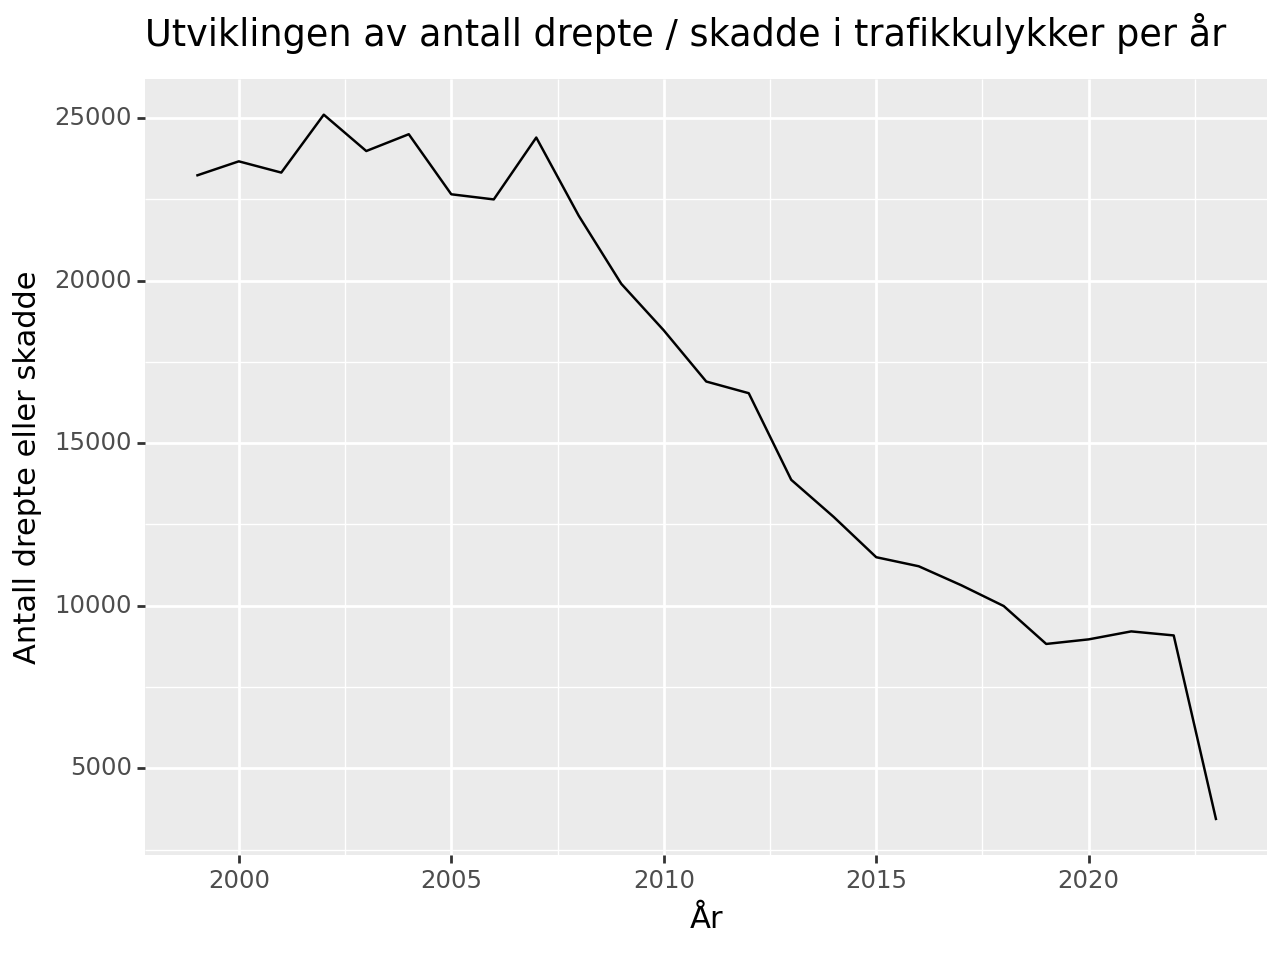

In [20]:
## This code is to calculate both the death and injuries grouped by years
from plotnine import ggplot, aes, geom_line, labs

# Convert 'måned' column to datetime
df['måned'] = pd.to_datetime(df['måned'])

# Extract the year from the 'måned' column
df['year'] = df['måned'].dt.year

# Group by year and sum the number of deaths or injures  for each year
drepte_eller_skadde_per_år = df.groupby('year')['08329: Drepte eller skadde i trafikkulykker,'].sum().reset_index()

# Create the plot using plotnine
plot = (
    ggplot(drepte_eller_skadde_per_år, aes(x='year', y='08329: Drepte eller skadde i trafikkulykker,'))
    + geom_line()
    + labs(title='Utviklingen av antall drepte / skadde i trafikkulykker per år', x='År', y='Antall drepte eller skadde')
)

# Print the plot
print(plot)

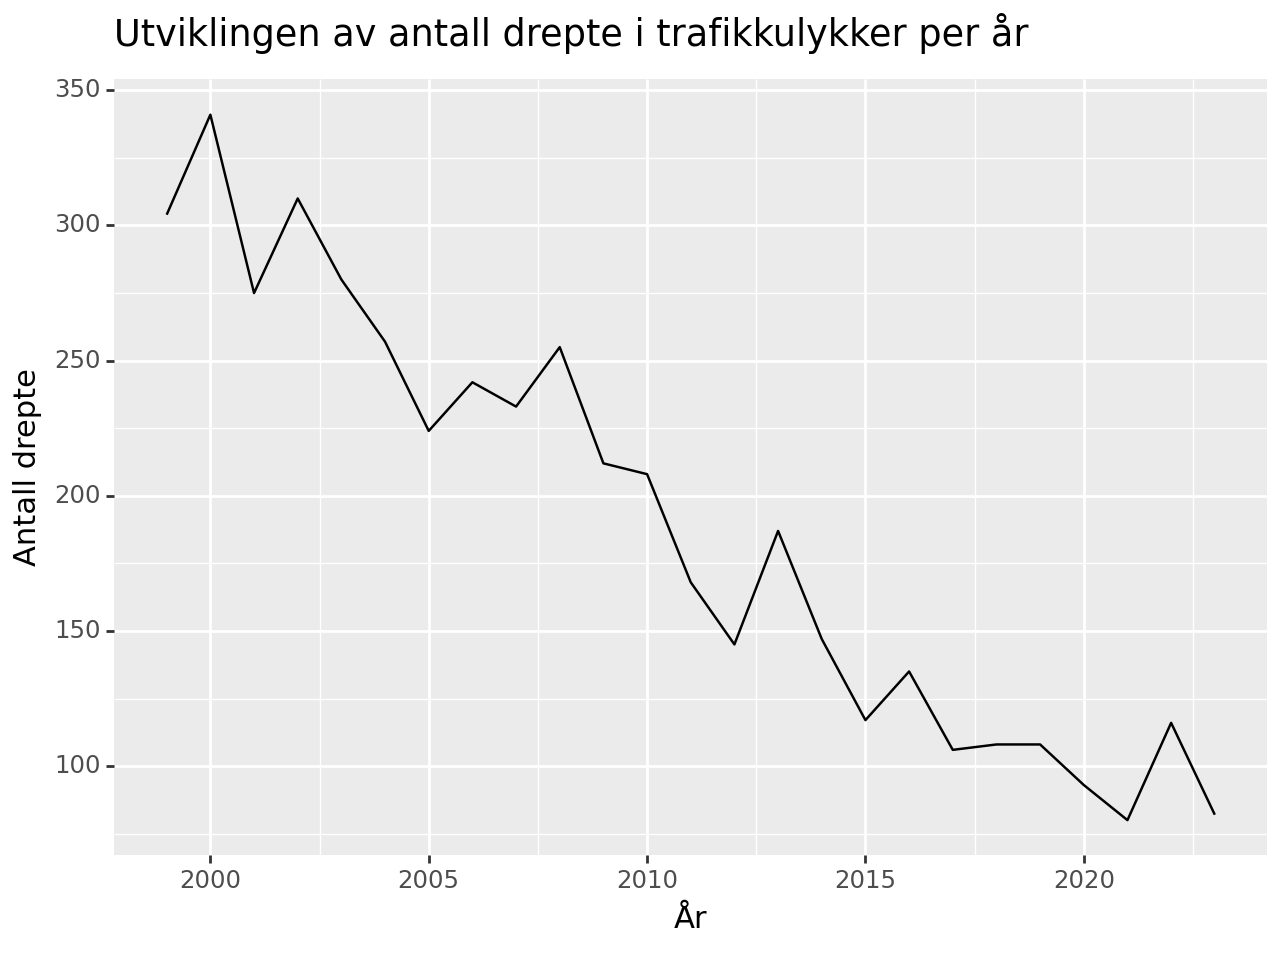

In [21]:
## This code is to calculate only the death grouped by years
from plotnine import ggplot, aes, geom_line, labs

# Convert 'måned' column to datetime
# df['måned'] = pd.to_datetime(df['måned'])

# Extract the year from the 'måned' column
# df['year'] = df['måned'].dt.year


# Filter the DataFrame for 'skadegrad' equal to 'Drept'
drepte_per_år = df[df['skadegrad'] == 'Drept']

# Group by year and sum the number of deaths for each year
drepte_per_år = drepte_per_år.groupby('year')['08329: Drepte eller skadde i trafikkulykker,'].sum().reset_index()

# Create the plot using plotnine
plot = (
    ggplot(drepte_per_år, aes(x='year', y='08329: Drepte eller skadde i trafikkulykker,'))
    + geom_line()
    + labs(title='Utviklingen av antall drepte i trafikkulykker per år', x='År', y='Antall drepte')
)

# Print the plot
print(plot)

AS the graphic shows that the number of death in traffic accedents reduce every year

# C) Er det sesongmessig variasjon i skadetallene? Plott pr. måned og se om du ser et mønster.

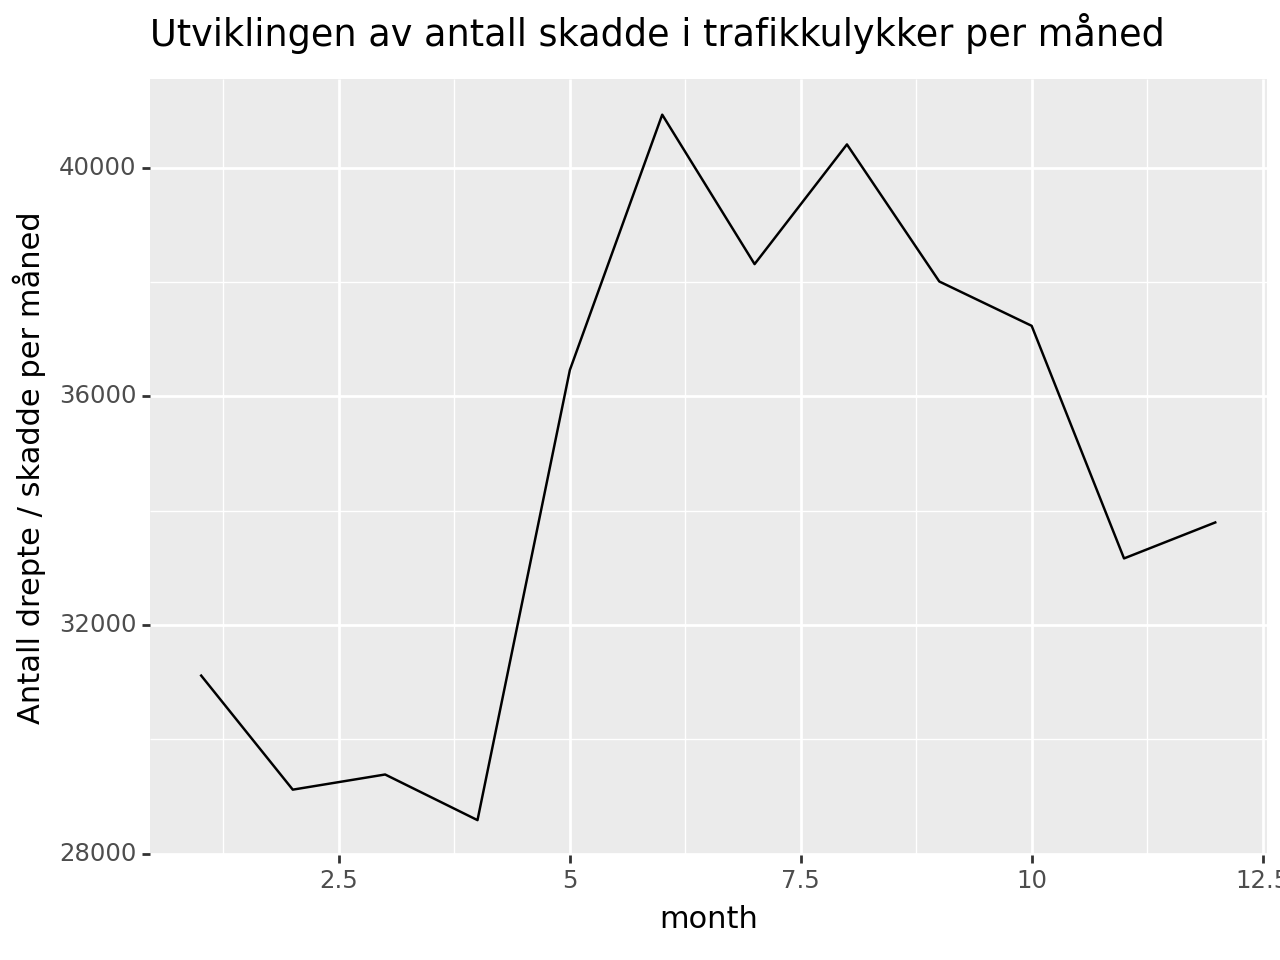

In [22]:
# Extract the month from the 'måned' column. måned column is actually the registred year and mounth in the original dataset
df['month'] = df['måned'].dt.month

# Group by months  and sum the number of injuries  for each month
drepte_eller_skadde_per_måned = df.groupby('month')['08329: Drepte eller skadde i trafikkulykker,'].sum().reset_index()

# Create the plot using plotnine
plot = (
    ggplot(drepte_eller_skadde_per_måned, aes(x='month', y='08329: Drepte eller skadde i trafikkulykker,'))
    + geom_line()
    + labs(title='Utviklingen av antall skadde i trafikkulykker per måned', x='month', y='Antall drepte / skadde per måned')
)

# Print the plot
print(plot)

The graph shows that the number of injuries and death in traffic accedents are higher in summer period (June,July, and August). This is maybe becuase of the drivers can drive faster in summer time. Or maybe becuase there are more cars in summer than in other seasons.

## D) Lag et plott som viser andel av de drepte eller skadde med de ulike skadegradene (inkl. drepte) for hvert år. Ikke ta med “Skadde i alt”.

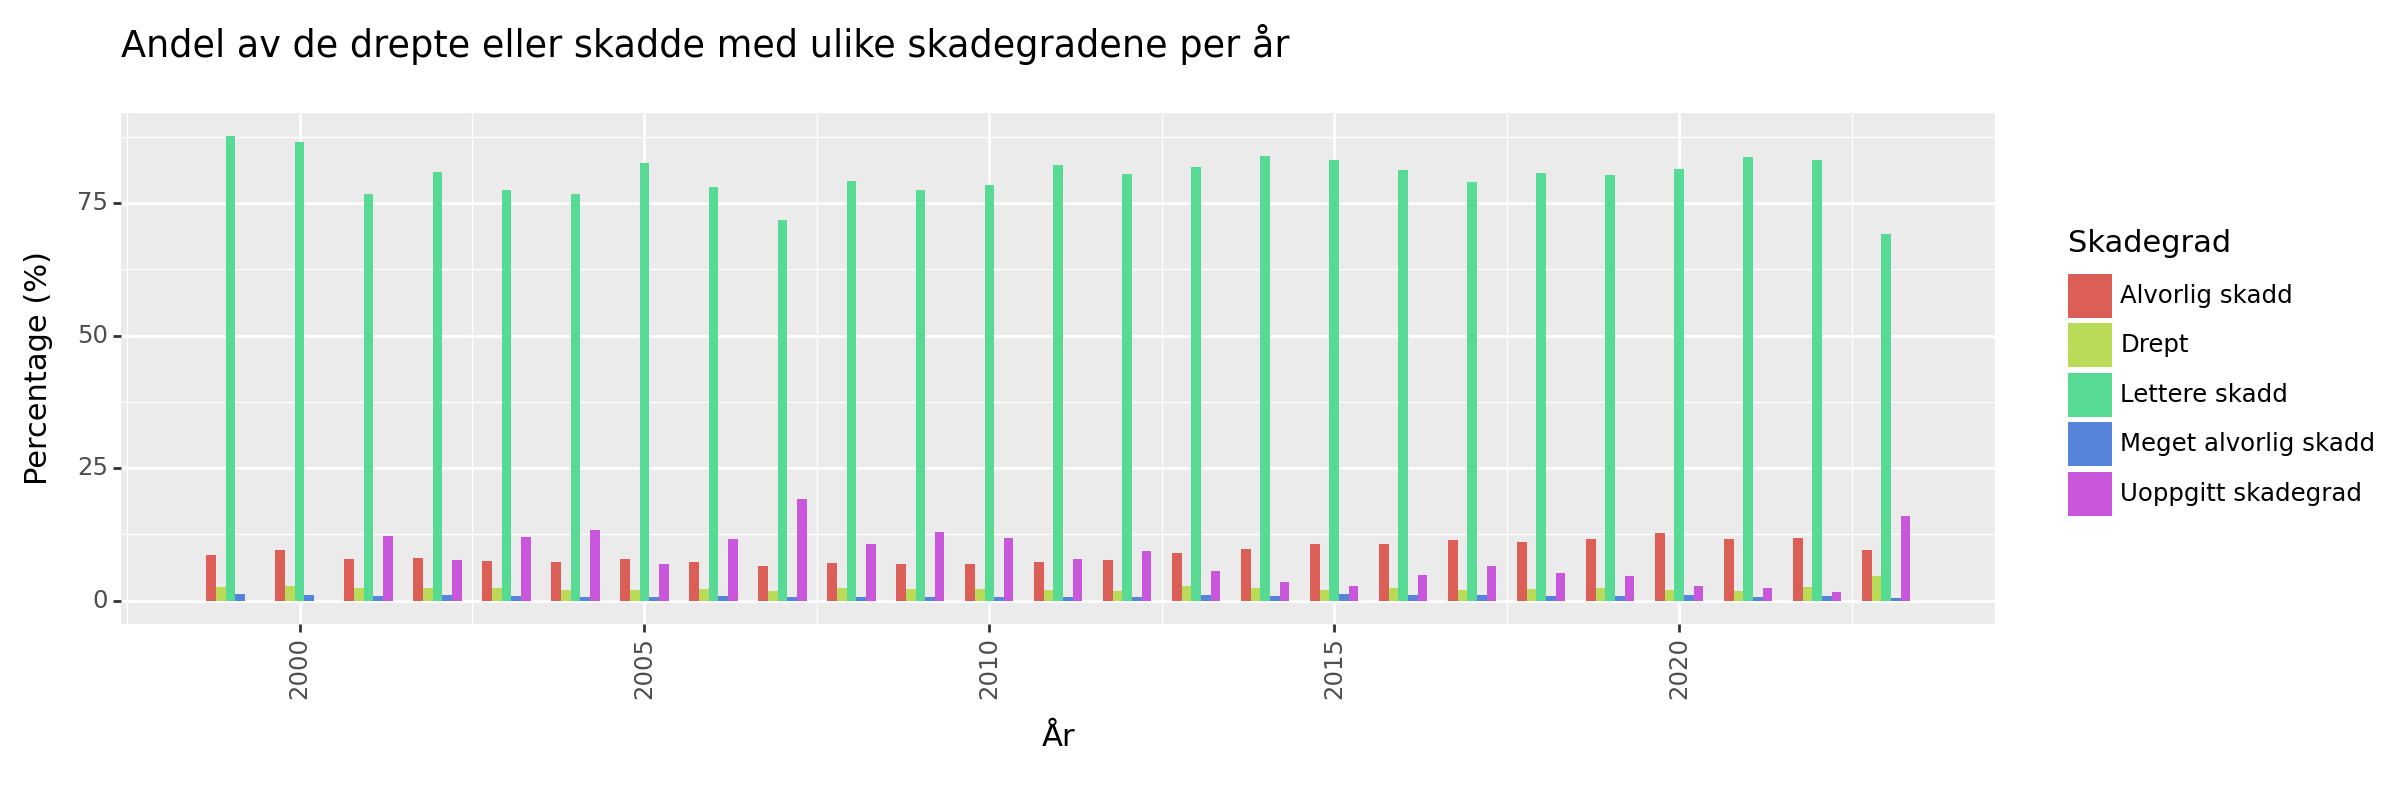

In [23]:
from plotnine import ggplot, aes, geom_bar, labs, theme, element_text

# Step1  - Exclude "Skadde i alt"
filtered_df = df[df['skadegrad'] != 'Skadde i alt']

# Step 2 - Group by year and skadegrad, and then calculate the total for each year
grouped_df = filtered_df.groupby(['year', 'skadegrad'])['08329: Drepte eller skadde i trafikkulykker,'].sum().reset_index()


# Step 3 - Calculate the total for each year
total_per_year = grouped_df.groupby('year')['08329: Drepte eller skadde i trafikkulykker,'].transform('sum')

# Step 4 - Calculate the percentage
grouped_df['percentage'] = (grouped_df['08329: Drepte eller skadde i trafikkulykker,'] / total_per_year) * 100

# Step 5 - Create the plot
plot = (
    ggplot(grouped_df, aes(x='year', y='percentage', fill='skadegrad'))
    + geom_bar(stat='identity', position='dodge', width=0.7) # adjust the width of bars
    + labs(title='Andel av de drepte eller skadde med ulike skadegradene per år',
           x='År', y='Percentage (%)', fill='Skadegrad')
    + theme(axis_text_x=element_text(rotation=90, hjust=10))
    + theme(figure_size=(12, 4))  # Adjust the width and height
)
print(plot)

## E) Lag et plott som viser utviklingen av de ulike typene møteulykker for hvert år (“Møting ved forbikjøring” og “Andre møteulykker”). Det har blitt bygget mange midtdelere, så disse bør det bli færre av.

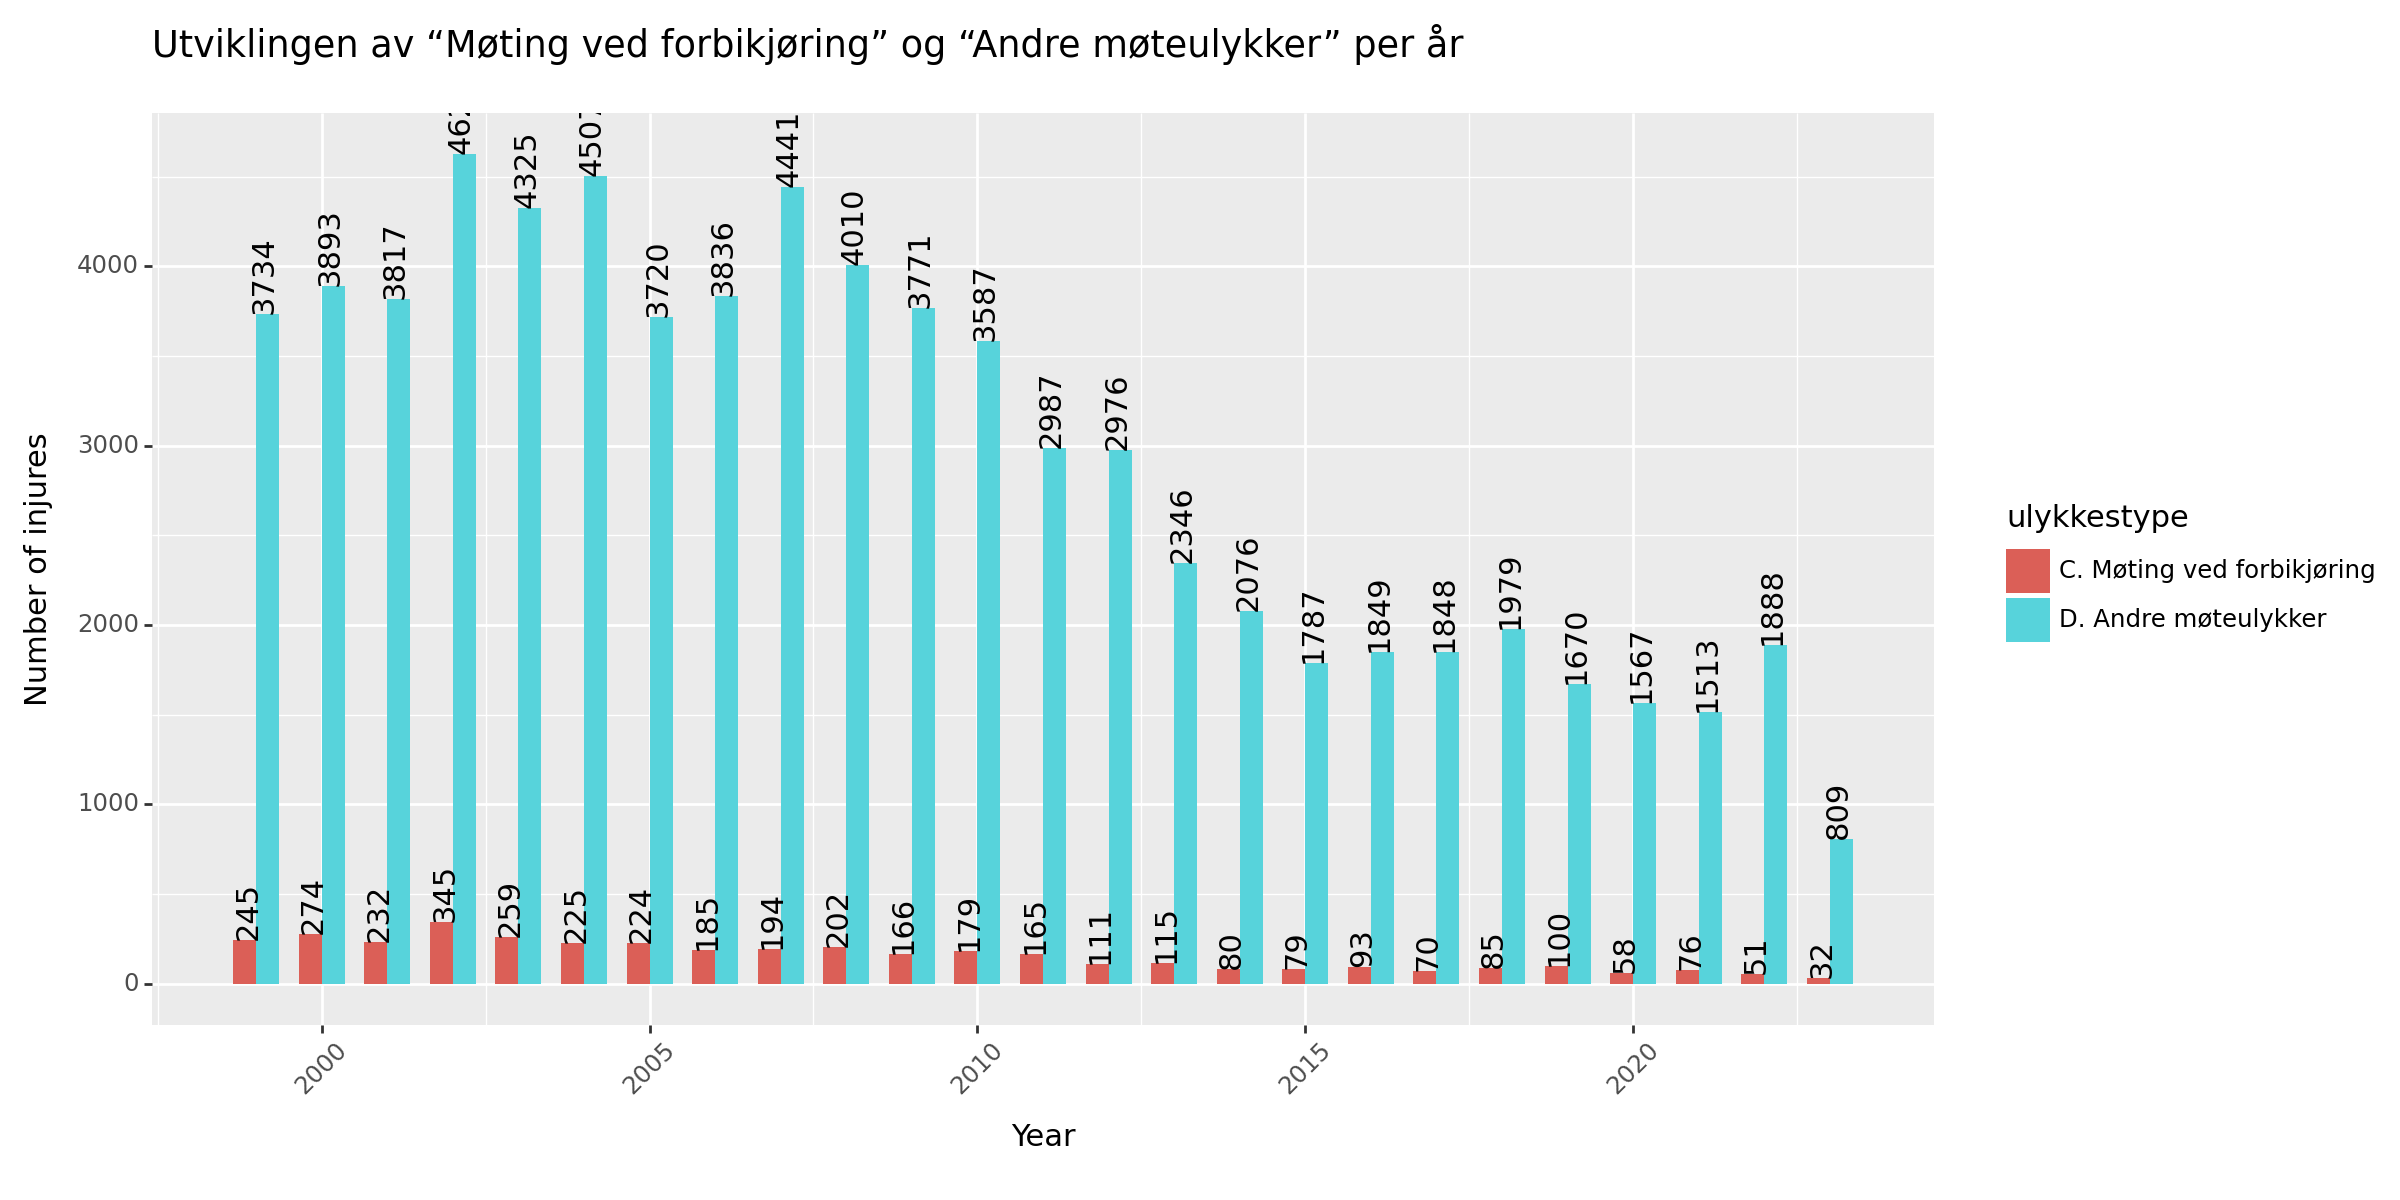

In [31]:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_col.html
from plotnine import ggplot, aes, geom_bar, labs, theme, element_text, geom_text, position_dodge

# Step 1 - Exclude all other ulykkestype
# filtered_ulykkestype_df = df[(df['ulykkestype'] == 'C. Møting ved forbikjøring') | (df['ulykkestype'] == 'D. Andre møteulykker')]

# or use
# Filter the dataframe for the relevant accident types
filtered_ulykkestype_df = df[df['ulykkestype'].isin(['C. Møting ved forbikjøring', 'D. Andre møteulykker'])]

# Step 2 - Group by year and skadegrad, and then calculate the total for each year
grouped_ulykkestype_df = filtered_ulykkestype_df.groupby(['year', 'ulykkestype'])['08329: Drepte eller skadde i trafikkulykker,'].sum().reset_index()


# Step 3 - Calculate the total for each year
total__ulykkestype_per_year = grouped_ulykkestype_df.groupby('year')['08329: Drepte eller skadde i trafikkulykker,'].transform('sum')

# Step 4 - Create the plot
plot = (
    ggplot(grouped_ulykkestype_df, aes(x='year', y='08329: Drepte eller skadde i trafikkulykker,', fill='ulykkestype'))
    + geom_bar(stat='identity', position='dodge', width=0.7) # adjust the width of bars
    + labs(title='Utviklingen av “Møting ved forbikjøring” og “Andre møteulykker” per år',
           x='Year', y='Number of injures', fill='ulykkestype')
    + geom_text(aes(label= '08329: Drepte eller skadde i trafikkulykker,'), position=position_dodge(width=0.5), angle=90, va='bottom')
    + theme(axis_text_x=element_text(rotation=45, hjust=10))
    + theme(figure_size=(12,6))  # to adjust the width and height
)
print(plot)

## E) answer 1
#### The graph shows that total injuries ”Møting ved forbikjøring” og “Andre møteulykker“ are reduced since 2007.
* Obviously 2023 should be excluded from the graph becuase it is not completed yet.
* Year 2023 confuses and gives falsely results.

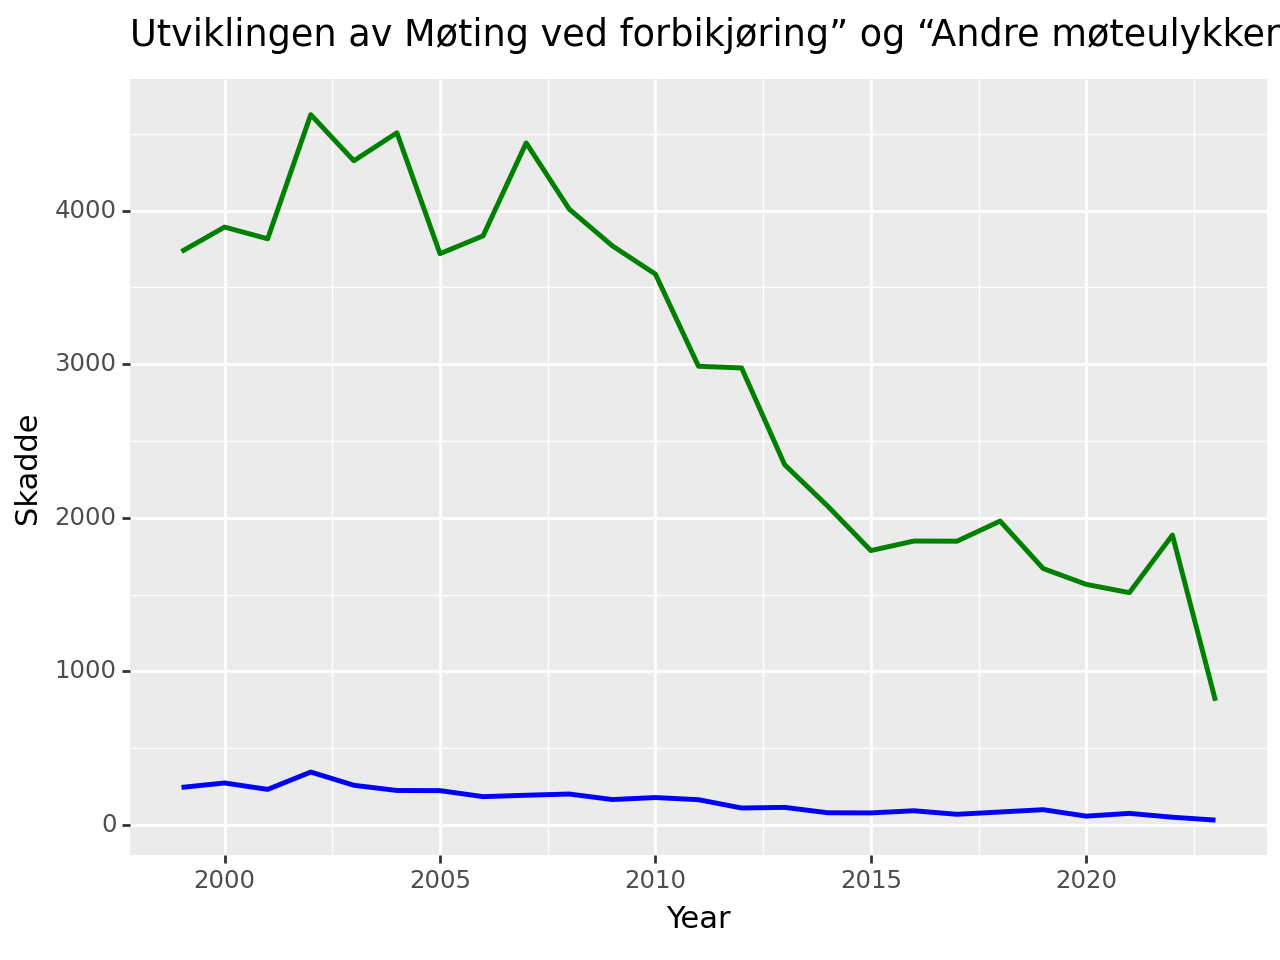

In [32]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_line, labs
import pandas as pd


# Step 1 - Exclude all other ulykkestype
# filtered_ulykkestype_df = df[(df['ulykkestype'] == 'C. Møting ved forbikjøring') | (df['ulykkestype'] == 'D. Andre møteulykker')]

# or use
# Filter the dataframe for the relevant accident types
filtered_ulykkestype_df = df[df['ulykkestype'].isin(['C. Møting ved forbikjøring', 'D. Andre møteulykker'])]

# Step 2 - Group by year and skadegrad, and then calculate the total for each year
grouped_ulykkestype_df = filtered_ulykkestype_df.groupby(['year', 'ulykkestype'])['08329: Drepte eller skadde i trafikkulykker,'].sum().reset_index()


# Step 3 - Calculate the total for each year
total__ulykkestype_per_year = grouped_ulykkestype_df.groupby('year')['08329: Drepte eller skadde i trafikkulykker,'].transform('sum')

# Step 4 - Retrieve 'C. Møting ved forbikjøring' from grouped_ulykkestype_df
c = grouped_ulykkestype_df[grouped_ulykkestype_df['ulykkestype'].isin(['C. Møting ved forbikjøring'])]

# Retrieve 'D. Andre møteulykker' from grouped_ulykkestype_df
d = grouped_ulykkestype_df[grouped_ulykkestype_df['ulykkestype'].isin(['D. Andre møteulykker'])]

# Step 5 - create json object from year, 'Møting ved forbikjøring', and 'Andre møteulykker'
# The three lists in the Json object sould index reset by reset_index(drop=True)
new_object = ({'year' :c.year.reset_index(drop=True), 'Møting ved forbikjøring': c['08329: Drepte eller skadde i trafikkulykker,'].reset_index(drop=True), 'Andre møteulykker': d['08329: Drepte eller skadde i trafikkulykker,'].reset_index(drop=True)})
# Step 6 - Create new df using pandas
new_df = pd.DataFrame(new_object)


# Step 7 - Create the plot
plot = (
    ggplot(new_df)
    + aes(x='year')
    + geom_line(aes(y= 'Møting ved forbikjøring', group='1'), color='blue', size=1, linetype='solid')
    + geom_line(aes(y= 'Andre møteulykker', group='1'), color='green', size=1, linetype='solid')
    + labs(title='Utviklingen av Møting ved forbikjøring” og “Andre møteulykker“ per år',
           x='Year',
           y='Skadde')
)
print(plot)

## E) answer 2
#### The Line graph (line plot) shows the same result of the previous graph. but this one is easier to notice.
* the total injuries ”Møting ved forbikjøring” og “Andre møteulykker“ are reduced since 2007.
* Obviously 2023 should be excluded from the graph becuase it is not completed yet.
* Year 2023 confuses and gives falsely results.

## F) Vegtrafikkindeksen sier noe om hvordan trafikkmengden har utviklet seg over tid, og er relevant informasjon for å forstå hvor mye tryggere det har blitt å være i trafikken.
* https://www.vegvesen.no/globalassets/fag/trafikk/trafikkdata/vegtrafikkindeksen_2023-05.pdf
* Tabell 8 viser kumulativ trafikkutvikling siden 2005. Bruk tabellen til å framskrive antall i hver skadegrad fra 2005 år i datasettet til 2022. Inkluder denne informasjonen i grafen fra deloppgave B.

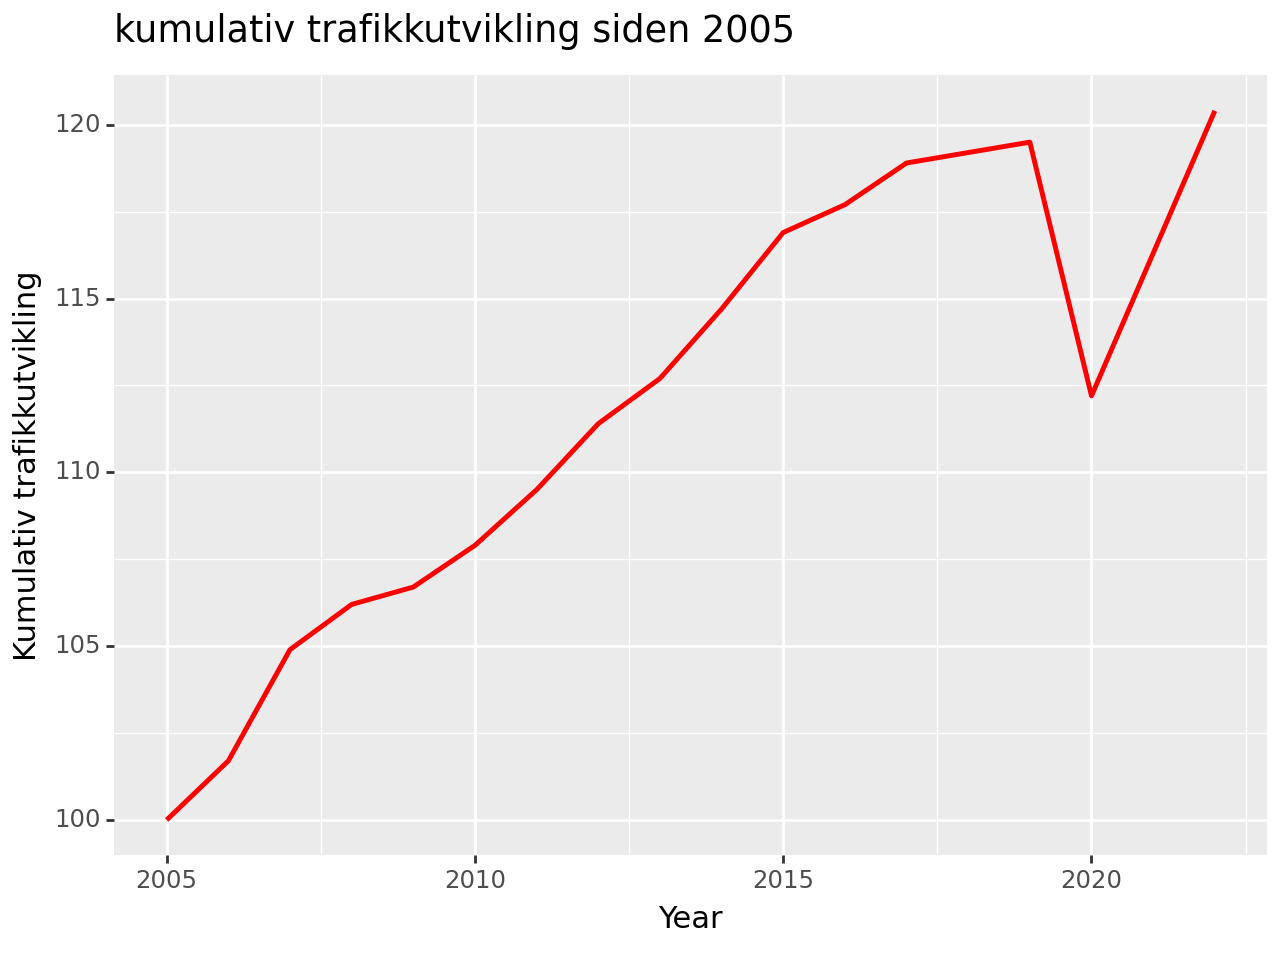

In [30]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_line, labs
import pandas as pd

trafikkutvikling_df = pd.DataFrame({
    'year' : [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Kumulativ_trafikkutvikling' : [100, 101.7, 104.9, 106.2, 106.7, 107.9, 109.5, 111.4, 112.7, 114.7, 116.9, 117.7, 118.9, 119.2, 119.5, 112.2, 116.3, 120.4]
})



plot = (
    ggplot(trafikkutvikling_df)
    + aes(x='year')
    + geom_line(aes(y= 'Kumulativ_trafikkutvikling', group='1'), color='red', size=1, linetype='solid')
    + labs(title='kumulativ trafikkutvikling siden 2005',
           x='Year',
           y='Kumulativ trafikkutvikling')
)
print(plot)